In [14]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Edicion / Presentacion."></form>''')

# Algo acerca de deep learning utilizando Python
## Expositor: Pedro Atencio - psatencioo@unal.edu.co
## Agenda del dia
<ul>
  <li>Por qué deberías utilizar Python</li>
  <li>Qué es deep learning</li>
  <li>Arquitecturas de redes neuronales artificiales</li>
  <li>Tecnologías de deep learning en Python y comparación</li>
  <li>VGG16 y finetuning</li>
  <li>Como podemos hacer deep learning sin supercomputadores propios?</li>
</ul>
<hr>

In [1]:
%matplotlib inline

# Por qué deberías utilizar Python
<ul>
    <li>C++, Python y Java se constituyen (con un aumento significativo del primero en los ultimos años) como los lenguajes estandar para la divulgación de resultados cientificos y academicos en este tema.</li>
    <br>
    <li>Generalmente, los autores de articulos cientificos relacionados con el tema, publican en GitHub o en repositorios propios, implementaciones en Python.</li>
    <br>
    <li>Las librerías más importantes para desarrollo de soluciones con DeepLearning (Caffe, Keras, Theano, TensorFlow, cuDNN, etc.) presentan API's para Python.</li>
    <br>
    <li>Literalmente, es mas sencillo configurar y desarrollar aplicaciones con las API de Python que con las de Java o C++.</li>
    <br>
    <li>En mi experiencia, la capacidad de implementar y validar soluciones parciales (hipotesis), es crucial para el trabajo en este campo.</li>
</ul>
<hr>

# Qué es deep learning?
<img src='./res/deeplearning.png' width='800px'>
## Qué no es!
<font size=3>
<br>
<ul>
    <li>NO es la inteligencia artificial en sí misma.</li>
    <br>
    <li>NO es el unico tópico o tema que se aborda desde la inteligencia artificial.</li>
    <br>
    <li>NO es la única forma de hacer machine learning.</li>
    <br>
    <li>NO es la mejor de las formas de hacer machine learning.</li>
    <br>
    <li>NO es big data o data mining.</li>
    <br>
    <li>NO es solo una tecnología.</li>
    <br>
    <li>NO es solo un concepto cientifico.</li>
    <br>
    <li>NO se usa solo para clasificar/reconocer.</li>
</ul>
</font>

## Qué es!
<font size=3>
<br>
<ul>
    <li>Es una especie de la familia machine learning, al igual que Sapiens es una especie de la familia Homo.</li>
    <br>
    <li>Es una aproximacion al aprendizaje de maquina que comparte ciertas propiedades y principios con la forma en que opera a nivel neuronal el cerebro (humano o no humano).</li>
    <br>
    <li>Es una disciplina científica dentro de las ciencias de la computación, con un estado actual de desarrollo tecnológico alto.</li>
    <br>
    <li>Es una tecnología en constante interacción con la investigación. </li>
    <br>
    <li>Es una de las formas de realizar machine learning con mayor impacto en resultados en los ultimos 10 años.</li>
    <br>
    <li>Es una de las formas de realizar machine learning mas rapidas y de mayor uso para aplicaciones comerciales </li>
    <br>
    <li>Es una de las formas más costosas de realizar machine learning: <a href='http://stackoverflow.com/questions/28232235/how-to-calculate-the-number-of-parameters-of-convolutional-neural-networkscnns'>Cuantos parametros tiene la red VGG-16? </a></li>
    <br>
    <li>Es una de las disciplinas mas prometedoras para crear una inteligencia artificial similar al hombre.</li>
</ul>
</font>
<br>
<b>Recomendados</b>:
<ul>
<li>Michael Nielsen's Neural Networks and Deep Learning: http://neuralnetworksanddeeplearning.com</li>
<br>
<li>Yoshua Bengio's Deep Learning Book: http://www.deeplearningbook.org</li>
<br>
<li>Adrian Colyer's The morning paper: https://blog.acolyer.org/?s=deep+learning</li>

<hr>

# Arquitecturas de redes neuronales artificiales
<br>
<a href='http://www.asimovinstitute.org/neural-network-zoo/'> El zoologico de las redes neuronales </a>
<br>
<ul>
    <li>Arquitectura: Organización, parámetros y algoritmos.</li>
    <br>
    <li>Qué se desea aprender?: reconocer, reconstruir, aprender, predecir, modelar comportamientos temporales, etc.</li>
    <br>
    <li>Cual es la naturaleza de la entrada y salida del sistema?</li>
</ul>
<hr>

# Tecnologías de deep learning en Python y comparación

<center>Figura. Algunas tecnologias</center>
<img src='./res/technologies.png' width='300px'>
<br>

Las tecnologias asociadas a la construccion de una solucion que utilice deep learning abarcan:
<ul>
    <li><b>Lenguaje de programacion</b></li>
    <li><b>Librerias</b>: Manejo de datos (hdf5, pickle, etc.), construccion de la arquitectura, visualizacion.</li>
    <li><b>Datasets</b>: Se requiere la modificacion de metadatos en los datasets actuales? Existen <a href='https://www.kaggle.com'>datasets</a> publicos? Se puede <a href='http://labelme.csail.mit.edu'>construir</a> el dataset?</li>
    <li><b>Arquitectura de computo</b>: Home PC + GPU, sistema distruibuido (hadoop y/o spark), cloud (google cloud, Azure, Amazon EC2, paperspace, etc.)</li>
    <li><b>Pre-trained models</b>: <a href='https://github.com/fchollet/keras/issues/1568'>Alexnet, VGG-16, GoogLeNet</a></li>
</ul>
<br>
<center>Figura. TensorBoard</center>
<img src='./res/tensorboard.png' width='300px'>


<hr>

# VGG16 y finetuning
## Utilizando la implementacion de los autores de VGG-16
<hr>

In [2]:
%matplotlib inline

import numpy as np
import utils; reload(utils)
from utils import plots
import matplotlib.pyplot as plt

Using Theano backend.


In [3]:
from vgg16 import Vgg16

In [4]:
#======================================
#Instantiate Vgg16
#======================================

vgg = Vgg16()

/Users/cornelius15/anaconda2/envs/deeplearning/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [6]:
#======================================
#Create batches for train and 
#validation Stages
#======================================

img_path = 'data/dogscats/sample/'

#Batch size used for fine tune the net
batchsize = 64
train_batches = vgg.get_batches(img_path+'train/', batch_size = batchsize)
valid_batches = vgg.get_batches(img_path+'valid/', batch_size = batchsize)

Found 62 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [8]:
#======================================
#Finetuning and fit
#======================================

import time

epochs = 2
vgg.finetune(train_batches)

start = time.time()
vgg.fit(train_batches, valid_batches, nb_epoch=epochs)
end = time.time()

print('execution time: ', end-start)

Epoch 1/2
62/62 [==============================] - 58s - loss: 1.3354 - acc: 0.5323 - val_loss: 0.5656 - val_acc: 0.8030
Epoch 2/2
62/62 [==============================] - 60s - loss: 1.0980 - acc: 0.6613 - val_loss: 0.3743 - val_acc: 0.9091
('execution time: ', 125.40787601470947)


Found 66 images belonging to 2 classes.
(array([ 0.9071,  0.983 ,  0.7943,  0.9645], dtype=float32), array([0, 0, 1, 0]), [u'tench', u'tench', u'goldfish', u'tench'])


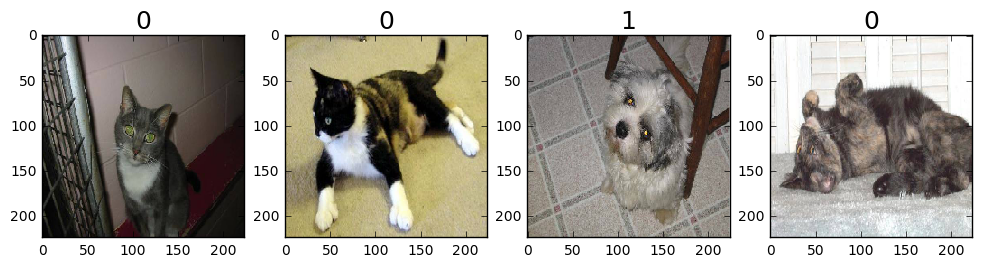

In [9]:
#======================================
#Use fine-tunned model to classify
#======================================
batchsize = 4
batch_to_predict = vgg.get_batches(img_path+'valid/', batch_size=batchsize)
imgs, labels = next(batch_to_predict)

pred = vgg.predict(imgs)

plots(imgs, titles=pred[1])
print(pred)

<hr>
## Creando nuestro propio modelo en Keras
<hr>

In [10]:
import keras
import os, json
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.models import Sequential, Model
from keras.utils.data_utils import get_file
from keras.preprocessing import image
from keras.optimizers import SGD, RMSprop, Adam

In [11]:
#======================================
#Download imagenet categories
#architecture
#======================================
FILE_PATH = 'http://www.platform.ai/models/'; CLASS_FILE = 'imagenet_class_index.json'
fpath = keras.utils.data_utils.get_file(CLASS_FILE,FILE_PATH+CLASS_FILE, cache_subdir='models')

with open(fpath) as f:
    class_dict = json.load(f)
    
#Comprehension to create an array from a dictionary
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

In [12]:
#======================================
#Create building blocks of neural
#network
#======================================
def ConvBlock(layers, model, filters):
    for i in range(layers):
        model.add(ZeroPadding2D((1,1)))
        model.add(Convolution2D(filters, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

def FCBlock(model):
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

In [14]:
#======================================
#Data processing
#======================================

#RGB means as estimated by authors
vgg_mean = np.array([123.68, 116.779, 103.939]).reshape((3,1,1))

#Reverse RGB->BGR
def vgg_preprocess(x):
    x = x - vgg_mean
    x = x[:,::-1]
    return x

In [16]:
#======================================
#Build VGG architecture
#======================================
def VGG_16():
    model = Sequential()
    model.add(Lambda(vgg_preprocess, input_shape=(3,224,224)))
    
    #Layers
    ConvBlock(2, model, 64)
    ConvBlock(2, model, 128)
    ConvBlock(3, model, 256)
    ConvBlock(3, model, 512)
    ConvBlock(3, model, 512)
    
    model.add(Flatten())
    FCBlock(model)
    FCBlock(model)
    
    model.add(Dense(1000, activation='softmax'))
    
    return model

In [17]:
#======================================
#Instantiate VGG_16
#======================================
vgg = VGG_16()

/Users/cornelius15/anaconda2/envs/deeplearning/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [19]:
print(vgg.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 3, 224, 224)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
zeropadding2d_14 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_14[0][0]           
____________________________________________________________________________________________________
zeropadding2d_15 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [20]:
#======================================
#Download and load pretrained weights
#======================================
fpath = get_file('vgg16.h5', FILE_PATH+'vgg16.h5', cache_subdir='models')
vgg.load_weights(fpath)

In [21]:
batch_size = 4

In [22]:
??image

In [23]:
global path 
path = 'data/dogscats/sample/'

#======================================
#Utilities
#======================================
def get_batches(dirname, gen=image.ImageDataGenerator(), shuffle=True, 
                batch_size=batch_size, class_mode='categorical'):
    return gen.flow_from_directory(path+dirname, target_size=(224,224), 
                class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

def pred_batch(model, imgs, classes):
    preds = model.predict(imgs)
    idxs = np.argmax(preds, axis=1)

    print('Shape: {}'.format(preds.shape))
    print('Classes: {}'.format(classes[:5]))
    print('First 5 probabilities: {}\n'.format(preds[0, :5]))
    print('Predictions prob/class: ')
    
    for i in range(len(idxs)):
        idx = idxs[i]
        print ('  {:.4f}/{}'.format(preds[i, idx], classes[idx]))
        
def finetune(model, batches, lr):
    model.pop()
    
    for layer in model.layers:
        layer.trainable = False
    
    model.add(Dense(batches.nb_class, activation='softmax'))
    model.compile(optimizer=Adam(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'])

def fit(model, batches, val_batches, nb_epoch=1):
        model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=nb_epoch,
                validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
        
def fit(model, batches, val_batches, nb_epoch=1):
    model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=nb_epoch, validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [24]:
#======================================
#Setup batches
#======================================
train_batches = get_batches('train', batch_size=batch_size)
valid_batches = get_batches('valid', batch_size=batch_size)

Found 62 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


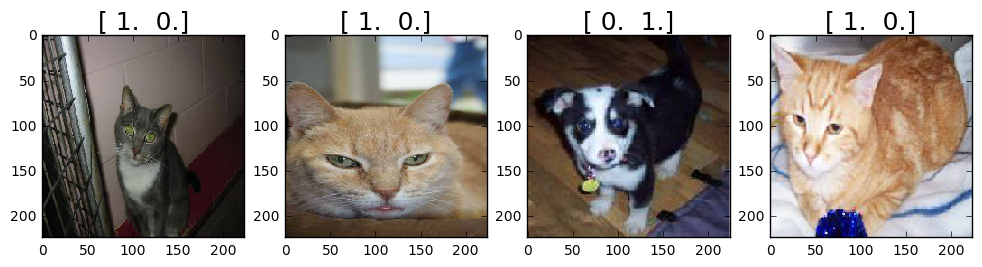

In [25]:
#======================================
#Get batches
#======================================
imgs, labels = next(valid_batches)
plots(imgs, titles=labels)

In [28]:
#======================================
#Prediction
#======================================
pred_batch(vgg, imgs, classes)

Shape: (4, 1000)
Classes: [u'tench', u'goldfish', u'great_white_shark', u'tiger_shark', u'hammerhead']
First 5 probabilities: [  9.1087e-07   3.0527e-06   7.4481e-05   1.1281e-05   1.7768e-05]

Predictions prob/class: 
  0.3027/Egyptian_cat
  0.2408/Egyptian_cat
  0.3243/Cardigan
  0.3525/tiger_cat


In [29]:
#======================================
#FineTuning
#======================================
finetune(vgg, train_batches, lr='0.001')
fit(vgg, train_batches, valid_batches, 2)

Epoch 1/2
62/62 [==============================] - 61s - loss: 1.0968 - acc: 0.7258 - val_loss: 0.2881 - val_acc: 0.8788
Epoch 2/2
62/62 [==============================] - 61s - loss: 0.2325 - acc: 0.9516 - val_loss: 0.0221 - val_acc: 1.0000


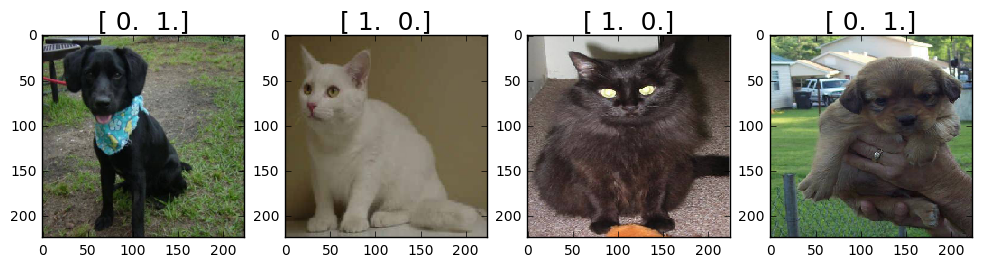

In [36]:
imgs, labels = next(valid_batches)
plots(imgs, titles=labels)

In [37]:
classes = ['cat','dog']
pred_batch(vgg, imgs, classes)

Shape: (4, 2)
Classes: ['cat', 'dog']
First 5 probabilities: [  2.5902e-05   9.9997e-01]

Predictions prob/class: 
  1.0000/dog
  1.0000/cat
  1.0000/cat
  0.9996/dog
